In [3]:
dirct = r'D:\python_code\M5 Competition\A5_solution\walmart_M5_forecasting\source_data\\'

## Forecasting M5 data with timegpt-1 long horizon forecasting

In [1]:
import os
import pandas as pd
import numpy as np
import pdcast as pdc
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

In [7]:
sales = pd.read_csv(dirct + 'sales_train_evaluation.csv')                             ## added
sales.name = 'sales'
calendar = pd.read_csv(dirct +'calendar.csv')
calendar.name = 'calendar'
prices = pd.read_csv(dirct +'sell_prices.csv')
prices.name = 'prices'

In [8]:
sales = pdc.downcast(sales)
calendar = pdc.downcast(calendar)
prices = pdc.downcast(prices)

In [9]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [10]:
sales_ad = np.round(df.memory_usage().sum()/(1024*1024),1)
sales_ad

np.float64(1693.3)

In [11]:
df = pdc.downcast(df)

In [12]:
sales_ad = np.round(df.memory_usage().sum()/(1024*1024),1)
sales_ad

np.float64(678.7)

In [13]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [14]:
calendar = pd.concat([calendar, pd.get_dummies(calendar['event_type_1'])], axis=1)

In [15]:
all_df = pd.merge(df, calendar, on='d', how='left')
all_df = pd.merge(all_df, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 


In [16]:
sales_all_df = np.round(all_df.memory_usage().sum()/(1024*1024),1)
sales_all_df

np.float64(3105.5)

In [17]:
all_df = pdc.downcast(all_df)
sales_all_df = np.round(all_df.memory_usage().sum()/(1024*1024),1)
sales_all_df

np.float64(2033.3)

In [18]:
all_df.head(15)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,Cultural,National,Religious,Sporting,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,NaN
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,NaN
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,NaN
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,0.46
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,1.56
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,NaN,NaN,False,False,False,False,False,False,False,3.17


In [19]:
all_df.dtypes

id              category
item_id         category
dept_id         category
cat_id          category
store_id        category
state_id        category
d               category
sold            category
date            category
wm_yr_wk          uint16
weekday         category
wday               uint8
month              uint8
year              uint16
event_name_1    category
event_type_1    category
event_name_2    category
event_type_2    category
snap_CA             bool
snap_TX             bool
snap_WI             bool
Cultural            bool
National            bool
Religious           bool
Sporting            bool
sell_price       float32
dtype: object

In [20]:
all_df['sell_price'].fillna('0', inplace=True)
all_df['sold'] = all_df['sold'].astype('uint8')
all_df['date'] = pd.to_datetime(all_df['date'])
for col in ['snap_CA', 'snap_TX', 'snap_WI', 'Cultural', 'National', 'Religious', 'Sporting']:
    all_df[col] = all_df[col].replace({True : 1, False :0})

In [21]:
col_to_drop = ['wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1','event_name_2', 'event_type_2']
all_dff = all_df.drop(columns = col_to_drop, axis= 1)

In [22]:
all_dff.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,snap_CA,snap_TX,snap_WI,Cultural,National,Religious,Sporting,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0


In [23]:
del df, sales, calendar, prices, all_df
gc.collect();

In [24]:
all_dff['date'] = all_dff['date'].astype({'date': 'datetime64[ns]'})

In [25]:
all_dff.dtypes

id                  category
item_id             category
dept_id             category
cat_id              category
store_id            category
state_id            category
d                   category
sold                   uint8
date          datetime64[ns]
snap_CA                int64
snap_TX                int64
snap_WI                int64
Cultural               int64
National               int64
Religious              int64
Sporting               int64
sell_price            object
dtype: object

In [26]:
all_dff.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,snap_CA,snap_TX,snap_WI,Cultural,National,Religious,Sporting,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,0,0,0,0,0,0,0,0


In [27]:
all_dff = all_dff.rename(columns={'id' : 'unique_id', 'date' : 'ds', 'sold' : 'y'})

In [28]:
all_dff = all_dff[['unique_id', 'ds', 'y', 'sell_price', 'Cultural', 'National', 'Religious', 'Sporting']]

In [ ]:
valid_data = all_dff[all_dff['ds'] <= '2016-04-24']
test_data = all_dff[all_dff['ds'] > '2016-04-24']

In [30]:
test_data.tail()

,unique_id,ds,y,sell_price,Cultural,National,Religious,Sporting
59181085,FOODS_3_823_WI_3_validation,2016-05-22,1,2.98,0,0,0,0
59181086,FOODS_3_824_WI_3_validation,2016-05-22,0,2.48,0,0,0,0
59181087,FOODS_3_825_WI_3_validation,2016-05-22,2,3.98,0,0,0,0
59181088,FOODS_3_826_WI_3_validation,2016-05-22,0,1.28,0,0,0,0
59181089,FOODS_3_827_WI_3_validation,2016-05-22,1,1.0,0,0,0,0


In [31]:
# Y_df = test_data[['unique_id', 'ds']]
# X_df = valid_data[['unique_id', 'ds', 'y']]
# Y_df = test_data[['unique_id', 'ds', 'sell_price']]
# X_df = valid_data[['unique_id', 'ds', 'y', 'sell_price']]
# Y_df = test_data.copy()
# X_df = valid_data.copy()

In [32]:
from nixtla import NixtlaClient
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    # api_key = 'nixak-heEAHtU6aEyKeYpKotwGZE9wbxgfHQ9MSlucNWLmTh76TVx1GsrdWvVi24euR5zvSXW2ZTerze09aAqS'
    # api_key = 'nixak-YORsPPzkZobbCjcjcImu7aqf8RlEh4zJTuJvQjICS69flOqNno0KzgR7lfTHFy7PW4bX1Klr96P8e3jM'
    api_key = 'nixak-3QgyCHk14zFmhzTcjG5qddk9T79U77a4FECI0UrI5iHv5U2wHnnZiENiD35KvQffXahSQEyrEpcvKV1z'
)

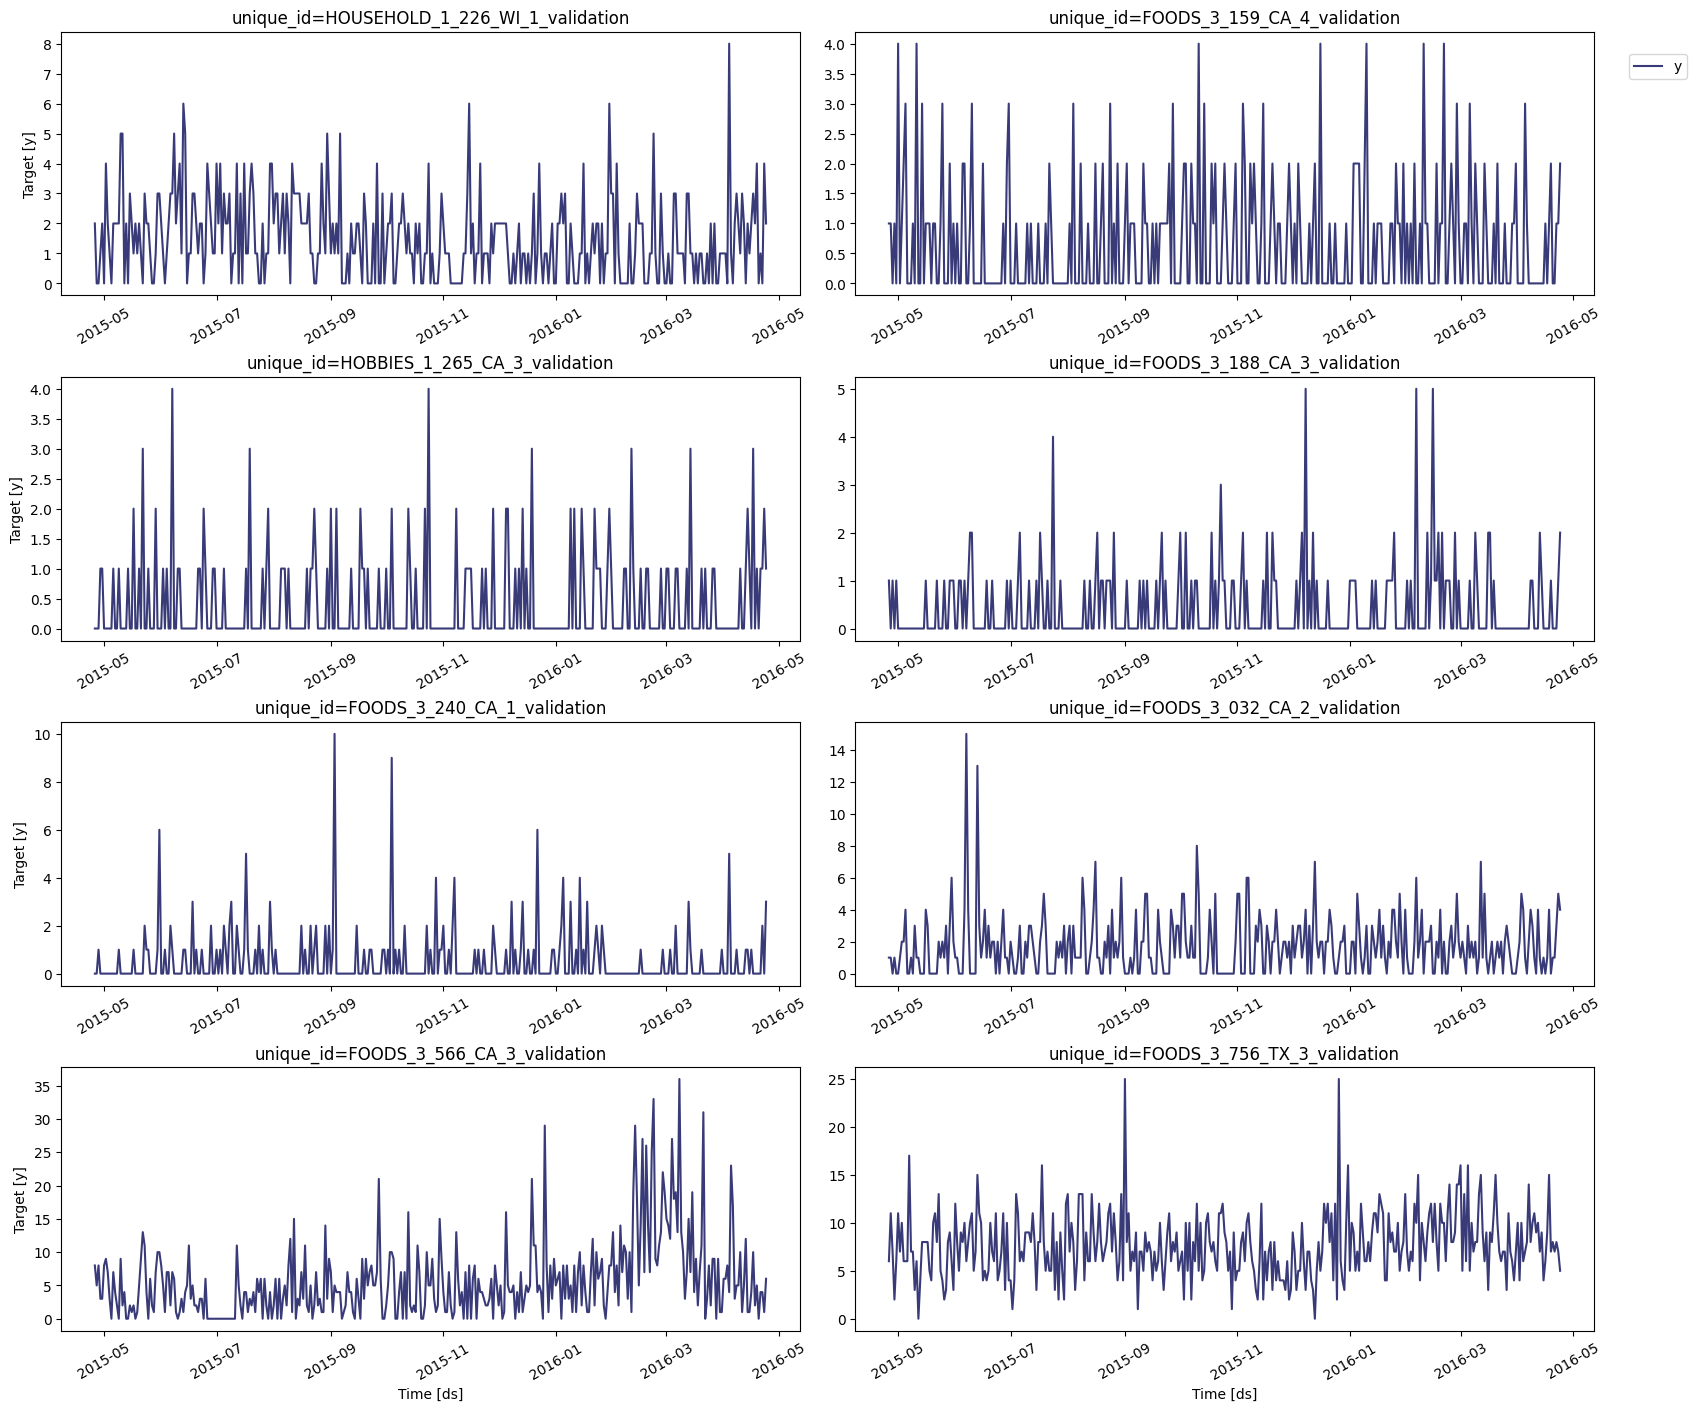

In [33]:
nixtla_client.plot(
    valid_data, 
    max_insample_length=365, 
)

In [ ]:
df_transformed = valid_data.copy()

df_transformed['y'] = np.log(df_transformed['y']+1)

df_transformed

,unique_id,ds,y,sell_price,Cultural,National,Religious,Sporting


,unique_id,ds,y,sell_price,Cultural,National,Religious,Sporting
0,HOBBIES_1_001_CA_1_validation,2011-01-29,0.000000,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,2011-01-29,0.000000,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,2011-01-29,0.000000,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,2011-01-29,0.000000,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,2011-01-29,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...
58327365,FOODS_3_823_WI_3_validation,2016-04-24,0.693359,2.98,0,0,0,0
58327366,FOODS_3_824_WI_3_validation,2016-04-24,0.000000,2.48,0,0,0,0
58327367,FOODS_3_825_WI_3_validation,2016-04-24,0.000000,3.98,0,0,0,0
58327368,FOODS_3_826_WI_3_validation,2016-04-24,1.386719,1.28,0,0,0,0


In [37]:

import time
start = time.time()
fcst_df = nixtla_client.forecast(
    df=df_transformed,
    h=28,                            
    level=[80],                        # Generate a 80% confidence interval
    finetune_steps=10,                 # Specify the number of steps for fine-tuning
    finetune_loss='mae',               # Use the MAE as the loss function for fine-tuning
    model='timegpt-1-long-horizon',    # Use the model for long-horizon forecasting
    time_col='ds',
    target_col='y',
    id_col='unique_id',
    num_partitions=2
)

end = time.time()

timegpt_duration = end - start

print(f"Time (TimeGPT): {timegpt_duration}")

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: D
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
  0%|          | 0/2 [00:00<?, ?it/s]ERROR:nixtla.nixtla_client:Attempt 1 failed with error: The write operation timed out
ERROR:nixtla.nixtla_client:Attempt 1 failed with error: The write operation timed out
ERROR:nixtla.nixtla_client:Attempt 2 failed with error: The write operation timed out
ERROR:nixtla.nixtla_client:Attempt 2 failed with error: The write operation timed out
ERROR:nixtla.nixtla_client:Attempt 3 failed with error: The write operation timed out
100%|██████████| 2/2 [05:01<00:00, 150.96s/it]


Time (TimeGPT): 307.6762113571167


In [38]:
fcst_df

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-lo-80
0,FOODS_1_001_CA_1_validation,2016-04-25,0.286031,0.768850,-0.196788
1,FOODS_1_001_CA_1_validation,2016-04-26,0.284704,0.973446,-0.404037
2,FOODS_1_001_CA_1_validation,2016-04-27,0.279961,0.810404,-0.250482
3,FOODS_1_001_CA_1_validation,2016-04-28,0.272952,1.099035,-0.553131
4,FOODS_1_001_CA_1_validation,2016-04-29,0.288453,0.821160,-0.244255
...,...,...,...,...,...
853715,HOUSEHOLD_2_516_WI_3_validation,2016-05-18,-0.004973,0.041198,-0.051145
853716,HOUSEHOLD_2_516_WI_3_validation,2016-05-19,-0.001760,0.049190,-0.052710
853717,HOUSEHOLD_2_516_WI_3_validation,2016-05-20,-0.003923,0.053259,-0.061105
853718,HOUSEHOLD_2_516_WI_3_validation,2016-05-21,-0.004538,0.035306,-0.044383


In [39]:
for col in ['TimeGPT', 'TimeGPT-hi-80', 'TimeGPT-lo-80']:
    fcst_df[col] = np.exp(fcst_df[col])-1

fcst_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-lo-80
0,FOODS_1_001_CA_1_validation,2016-04-25,0.331134,1.157284,-0.178635
1,FOODS_1_001_CA_1_validation,2016-04-26,0.329369,1.647050,-0.332381
2,FOODS_1_001_CA_1_validation,2016-04-27,0.323078,1.248816,-0.221575
3,FOODS_1_001_CA_1_validation,2016-04-28,0.313837,2.001269,-0.424854
4,FOODS_1_001_CA_1_validation,2016-04-29,0.334361,1.273136,-0.216712


In [40]:
fcst_df.to_csv(dirct+ 'forecast_df_item.csv')

In [42]:
fcst_df

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-lo-80
0,FOODS_1_001_CA_1_validation,2016-04-25,0.331134,1.157284,-0.178635
1,FOODS_1_001_CA_1_validation,2016-04-26,0.329369,1.647050,-0.332381
2,FOODS_1_001_CA_1_validation,2016-04-27,0.323078,1.248816,-0.221575
3,FOODS_1_001_CA_1_validation,2016-04-28,0.313837,2.001269,-0.424854
4,FOODS_1_001_CA_1_validation,2016-04-29,0.334361,1.273136,-0.216712
...,...,...,...,...,...
853715,HOUSEHOLD_2_516_WI_3_validation,2016-05-18,-0.004961,0.042058,-0.049859
853716,HOUSEHOLD_2_516_WI_3_validation,2016-05-19,-0.001759,0.050420,-0.051345
853717,HOUSEHOLD_2_516_WI_3_validation,2016-05-20,-0.003916,0.054703,-0.059276
853718,HOUSEHOLD_2_516_WI_3_validation,2016-05-21,-0.004528,0.035936,-0.043412


In [53]:
test_data = test_data.sort_values(by=['unique_id', 'ds']).reset_index(drop=True)
fcst_df = fcst_df.reset_index(drop=True)

In [60]:
result_without_snap = pd.concat([test_data, fcst_df], axis= 1)

In [61]:
result_without_snap

,unique_id,ds,y,sell_price,Cultural,National,Religious,Sporting,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-lo-80
0,FOODS_1_001_CA_1_validation,2016-04-25,2,2.24,0,0,0,0,FOODS_1_001_CA_1_validation,2016-04-25,0.331134,1.157284,-0.178635
1,FOODS_1_001_CA_1_validation,2016-04-26,0,2.24,0,0,0,0,FOODS_1_001_CA_1_validation,2016-04-26,0.329369,1.647050,-0.332381
2,FOODS_1_001_CA_1_validation,2016-04-27,0,2.24,0,0,0,0,FOODS_1_001_CA_1_validation,2016-04-27,0.323078,1.248816,-0.221575
3,FOODS_1_001_CA_1_validation,2016-04-28,0,2.24,0,0,0,0,FOODS_1_001_CA_1_validation,2016-04-28,0.313837,2.001269,-0.424854
4,FOODS_1_001_CA_1_validation,2016-04-29,0,2.24,0,0,0,0,FOODS_1_001_CA_1_validation,2016-04-29,0.334361,1.273136,-0.216712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
853715,HOUSEHOLD_2_516_WI_3_validation,2016-05-18,0,5.94,0,0,0,0,HOUSEHOLD_2_516_WI_3_validation,2016-05-18,-0.004961,0.042058,-0.049859
853716,HOUSEHOLD_2_516_WI_3_validation,2016-05-19,0,5.94,0,0,0,0,HOUSEHOLD_2_516_WI_3_validation,2016-05-19,-0.001759,0.050420,-0.051345
853717,HOUSEHOLD_2_516_WI_3_validation,2016-05-20,0,5.94,0,0,0,0,HOUSEHOLD_2_516_WI_3_validation,2016-05-20,-0.003916,0.054703,-0.059276
853718,HOUSEHOLD_2_516_WI_3_validation,2016-05-21,0,5.94,0,0,0,0,HOUSEHOLD_2_516_WI_3_validation,2016-05-21,-0.004528,0.035936,-0.043412


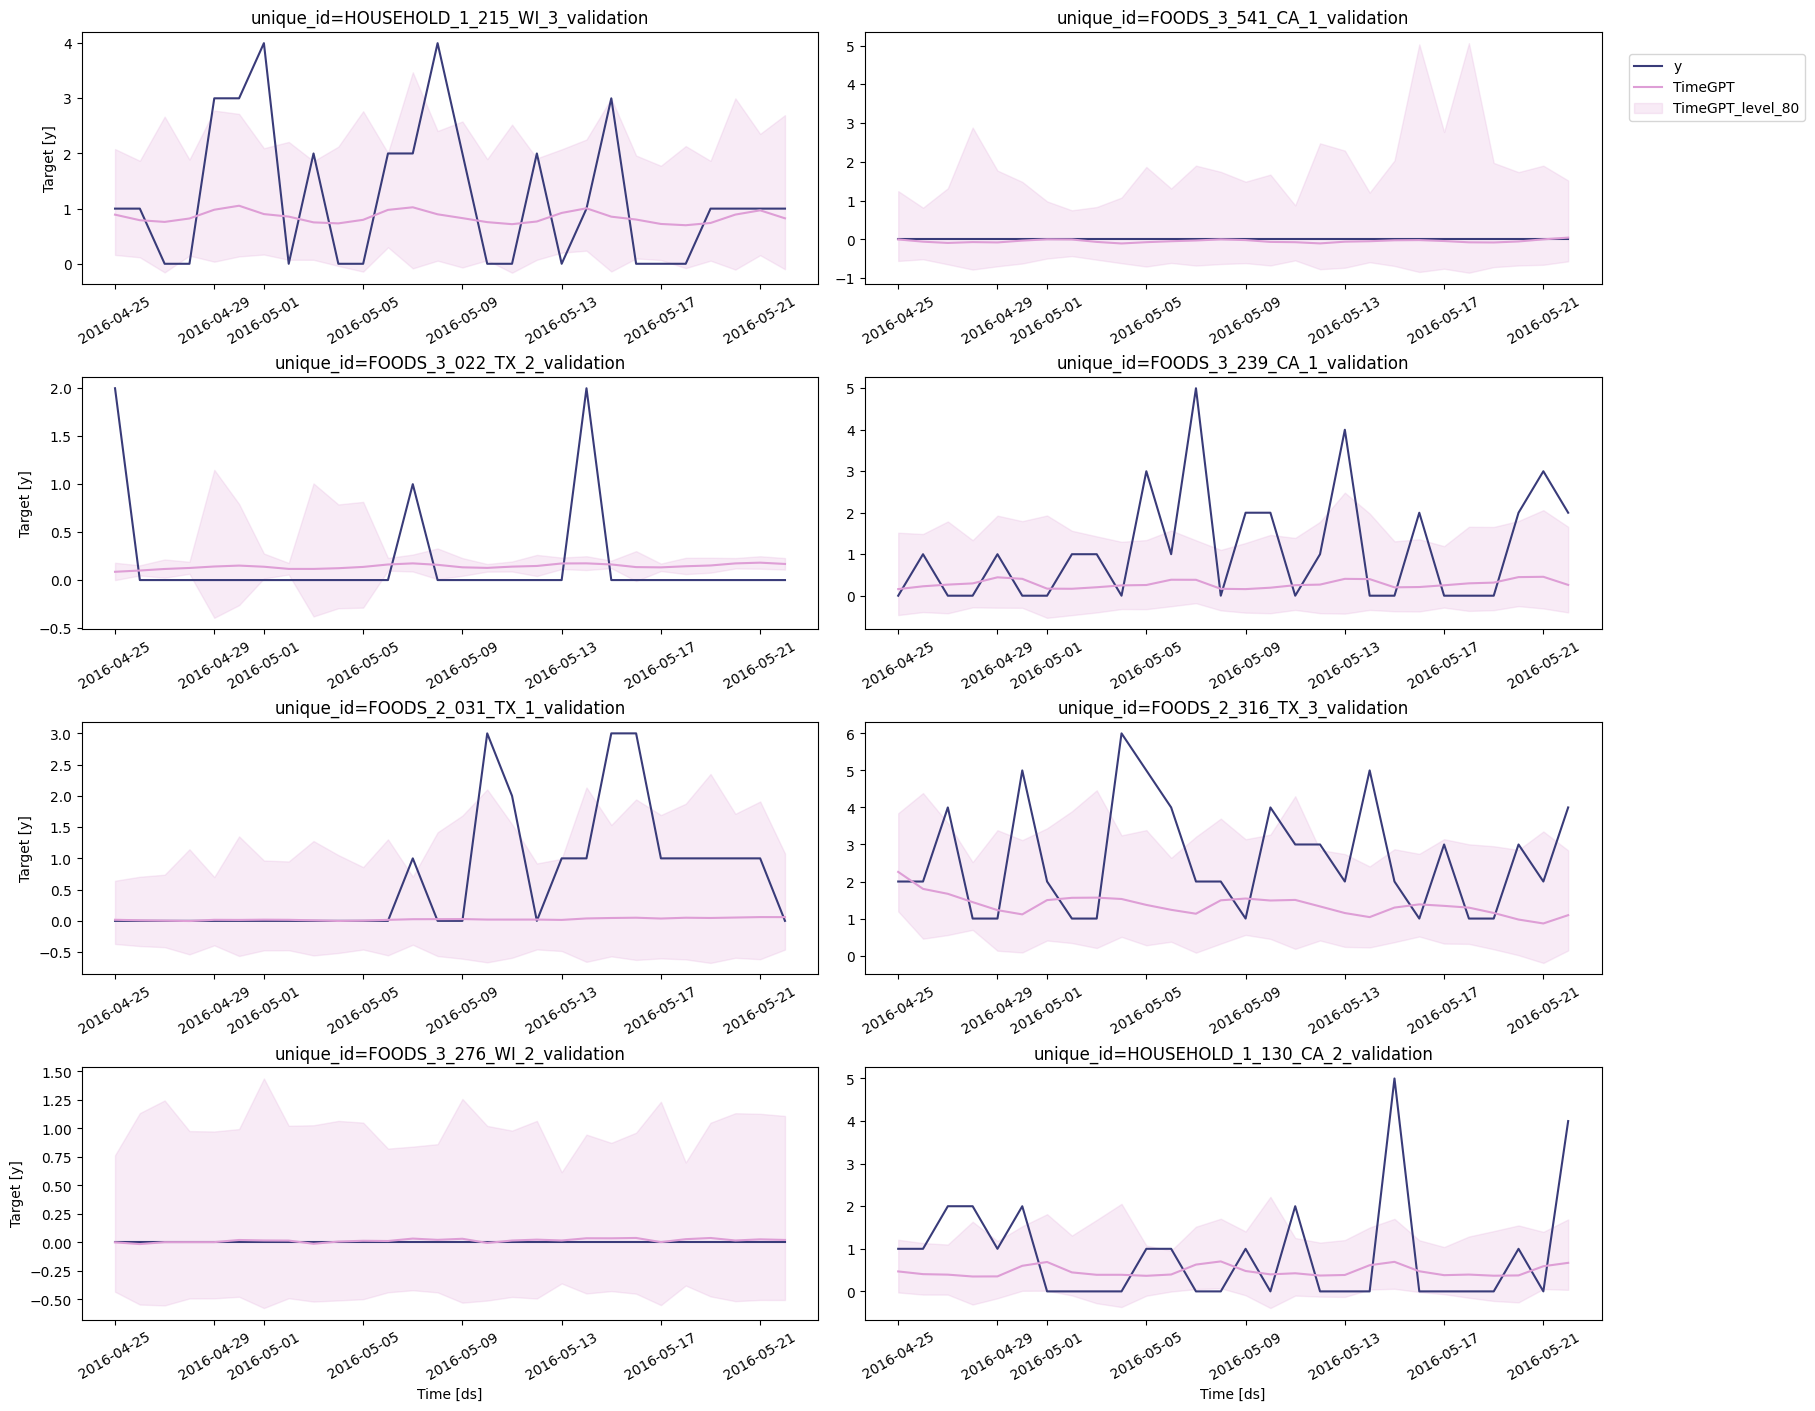

In [62]:
nixtla_client.plot(test_data, fcst_df, models=['TimeGPT'], level=[80], time_col='ds', target_col='y')

In [92]:
mse_tuned = mean_squared_error(result_without_snap['y'],result_without_snap['TimeGPT'])
rmse_tuned = np.sqrt(mse_tuned)
rmse_tuned

np.float64(2.336961112197519)

In [69]:
result_with_snap = pd.read_csv(dirct + 'forecast_df_prod.csv')


In [89]:
test_data

,unique_id,ds,y,sell_price,Cultural,National,Religious,Sporting
0,FOODS_1_001_CA_1_validation,2016-04-25,2,2.24,0,0,0,0
1,FOODS_1_001_CA_1_validation,2016-04-26,0,2.24,0,0,0,0
2,FOODS_1_001_CA_1_validation,2016-04-27,0,2.24,0,0,0,0
3,FOODS_1_001_CA_1_validation,2016-04-28,0,2.24,0,0,0,0
4,FOODS_1_001_CA_1_validation,2016-04-29,0,2.24,0,0,0,0
...,...,...,...,...,...,...,...,...
853715,HOUSEHOLD_2_516_WI_3_validation,2016-05-18,0,5.94,0,0,0,0
853716,HOUSEHOLD_2_516_WI_3_validation,2016-05-19,0,5.94,0,0,0,0
853717,HOUSEHOLD_2_516_WI_3_validation,2016-05-20,0,5.94,0,0,0,0
853718,HOUSEHOLD_2_516_WI_3_validation,2016-05-21,0,5.94,0,0,0,0


In [73]:
result_with_snap = pd.concat([test_data, result_with_snap], axis= 1)

In [ ]:
result_with_snap

,unique_id,ds,y,sell_price,Cultural,National,Religious,Sporting,Unnamed: 0,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-lo-80
0,FOODS_1_001_CA_1_validation,2016-04-25,2,2.24,0,0,0,0,0,FOODS_1_001_CA_1_validation,2016-04-25,0.474065,7.861066,-0.153779
1,FOODS_1_001_CA_1_validation,2016-04-26,0,2.24,0,0,0,0,1,FOODS_1_001_CA_1_validation,2016-04-26,0.471343,63.863278,-0.247339
2,FOODS_1_001_CA_1_validation,2016-04-27,0,2.24,0,0,0,0,2,FOODS_1_001_CA_1_validation,2016-04-27,0.459067,11.074627,-0.182552
3,FOODS_1_001_CA_1_validation,2016-04-28,0,2.24,0,0,0,0,3,FOODS_1_001_CA_1_validation,2016-04-28,0.438341,611.493764,-0.294337
4,FOODS_1_001_CA_1_validation,2016-04-29,0,2.24,0,0,0,0,4,FOODS_1_001_CA_1_validation,2016-04-29,0.479418,11.855164,-0.178867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853715,HOUSEHOLD_2_516_WI_3_validation,2016-05-18,0,5.94,0,0,0,0,853715,HOUSEHOLD_2_516_WI_3_validation,2016-05-18,-0.005462,0.044287,-0.048689
853716,HOUSEHOLD_2_516_WI_3_validation,2016-05-19,0,5.94,0,0,0,0,853716,HOUSEHOLD_2_516_WI_3_validation,2016-05-19,-0.002532,0.052076,-0.049420
853717,HOUSEHOLD_2_516_WI_3_validation,2016-05-20,0,5.94,0,0,0,0,853717,HOUSEHOLD_2_516_WI_3_validation,2016-05-20,-0.004530,0.056649,-0.056150
853718,HOUSEHOLD_2_516_WI_3_validation,2016-05-21,0,5.94,0,0,0,0,853718,HOUSEHOLD_2_516_WI_3_validation,2016-05-21,-0.005232,0.037185,-0.042817


In [77]:
result_with_snap.isnull().sum()

unique_id        0
ds               0
y                0
sell_price       0
Cultural         0
National         0
Religious        0
Sporting         0
Unnamed: 0       0
unique_id        0
ds               0
TimeGPT          0
TimeGPT-hi-80    0
TimeGPT-lo-80    0
dtype: int64

In [88]:
result_with_snap['TimeGPT']

0         0.474065
1         0.471343
2         0.459067
3         0.438341
4         0.479418
            ...   
853715   -0.005462
853716   -0.002532
853717   -0.004530
853718   -0.005232
853719    0.000002
Name: TimeGPT, Length: 853720, dtype: float64

In [90]:
np.isfinite(test_data['y'])

0         True
1         True
2         True
3         True
4         True
          ... 
853715    True
853716    True
853717    True
853718    True
853719    True
Name: y, Length: 853720, dtype: bool